<a href="https://colab.research.google.com/github/5ecret99/EX1_MACHINE_LEARNING_DIT_20-21/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

II.


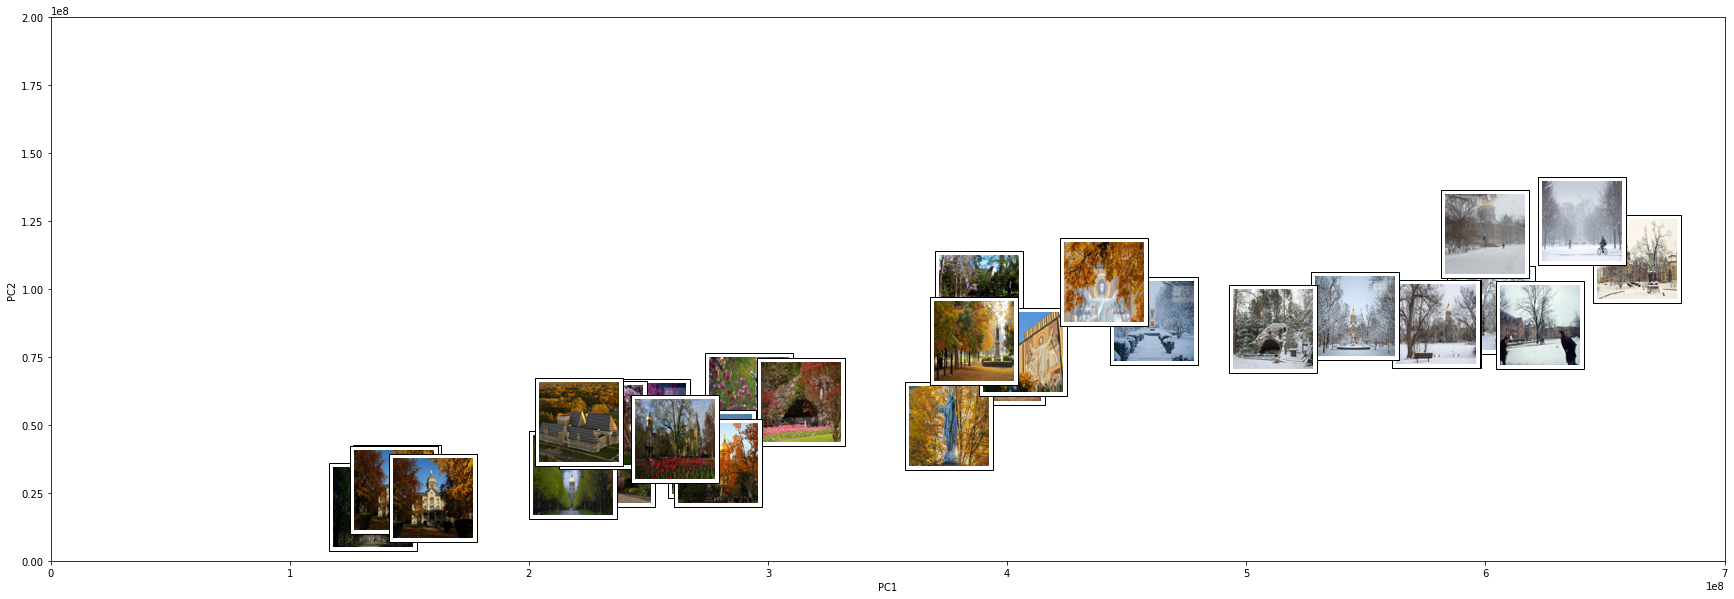

V.1
Accuracy of (1-ΝΝ) with initial values : 0.700 percent
Accuracy of (3-ΝΝ) with initial values : 0.767 percent
Accuracy of (1-ΝΝ) with pca_data values : 0.733 percent
Accuracy of (3-ΝΝ) with pca_data values : 0.700 percent
V.2 Για την διάσταση πολλ/πλασιάζω κάθε διάνυσματική στήλη κάθε εικόνας με τις δύο πρώτες κύριες συνιστώσες και φτιάχνω ενα πίνακα απο tuples
(PC1 επι διανυσματική στήλη κάθε εικόνας,PC2 επι διανυσματική στήλη κάθε εικόνας)


In [ ]:
#Ερώτημα 1:
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import  OffsetImage, AnnotationBbox
from matplotlib.pyplot import figure
import sklearn
from sklearn import neighbors,preprocessing,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

#ypoerwtima I.
#source: https://necromuralist.github.io/neural_networks/posts/image-to-vector/
def loadImages(path):
  labels=[]
  npimages=[]
  i=0  
  images=glob.glob(path+"/*.jpg")
  for image in images:
    img=Image.open(image)
    img=img.resize((100,100))#resizing all images to 100 x 100

    np_img = np.array(img)#turning image to numpy format -  RGB
    x, y, z = np_img.shape

    np_img=np_img.reshape((x * y * z, 1))#reshaping the vector to one row
    npimages.append(np_img)

    category=image[len(path)+1]
    #saving the season as 0,1,2
    if(category=="F"):
      labels.append(1)
    elif(category=="S"):
      labels.append(2)
    elif(category=="W"):
      labels.append(0)
    
    i=i+1
  return(np.asarray(labels),np.asarray(npimages))

#ypoerwtima II
#source: https://colab.research.google.com/drive/1daMl6Cce7OMeez_KVnNI0Namj3_VTenV?usp=sharing#scrollTo=ddhh1hflBA6_
def PCA_ImageSpaceVisualization(X):

  meanVector=[]
  for img in X:
    meanVector.append(np.mean(img))
  meanVector=np.asarray(meanVector)
  
  dim=X.shape[0]
  samplesNum=X.shape[1]

  scatterMat = np.zeros((dim,dim))
  for i in range(samplesNum):
    scatterMat += (X[:,i].reshape(dim,1) - meanVector).dot((X[:,i].reshape(dim,1) - meanVector).T)
  
  eigValue, eigVector = np.linalg.eig(scatterMat)

  k=2
  aDict={}
  selectededEigenVectors=[]

  for a in zip(eigValue, eigVector):
    aDict[abs(a[0])]=a[1]
  
  n=0
  for aKey in sorted(aDict,reverse=True): ## sort by the key
    n+=1
    selectededEigenVectors+=[aDict[aKey].reshape(dim,1)] ## select the eigenvectors
    if n==k:
      break
  w=np.hstack(selectededEigenVectors)
  X=np.squeeze(X)
  w=np.squeeze(w)
  classAllTrans = w.T.dot(X)
  
  #source: https://moonbooks.org/Articles/How-to-insert-an-image-a-picture-or-a-photo-in-a-matplotlib-figure/
  fig, ax =  plt.subplots(sharex=True, figsize=(30,10))
  ax.set_xlim(0, 700000000)#max x value
  ax.set_ylim(0, 200000000)#max y value
  plt.xlabel('PC1')
  plt.ylabel('PC2');

  for img in X:

    actual=img.reshape((100,100,3))#back in RGB dimensions

    imagebox = OffsetImage(actual, zoom=0.8)
    ab = AnnotationBbox(imagebox, (classAllTrans[0].dot(img),classAllTrans[1].dot(img)))#putting the image in the aproriate point
    ax.add_artist(ab)
  plt.show()
  return classAllTrans

labels,npimages =loadImages("drive/MyDrive/images")
print("II.")
pca=PCA_ImageSpaceVisualization(npimages)

npimages=np.squeeze(npimages)
#ypoerwtima V
print("V.1")
#initial data and 1-NN
KNN=neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(KNN, npimages, labels,scoring='accuracy', cv=5)
print('Accuracy of (1-ΝΝ) with initial values : %.3f percent' % (mean(scores)))

#initial data and 3-NN
KNN=neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(KNN, npimages, labels,scoring='accuracy', cv=5)
print('Accuracy of (3-ΝΝ) with initial values : %.3f percent' % (mean(scores)))

#using pca making the initial data like we did in the graph 

pca_data=[]
for npim in npimages:
  pca_data.append((pca[0].dot(npim),pca[0].dot(npim)))
pca_data=np.asarray(pca_data)

#pca data and 1-NN
KNN=neighbors.KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(KNN, pca_data, labels,scoring='accuracy', cv=5)
print('Accuracy of (1-ΝΝ) with pca_data values : %.3f percent' % (mean(scores)))

#pca data and 3-NN
KNN=neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(KNN, pca_data, labels,scoring='accuracy', cv=5)
print('Accuracy of (3-ΝΝ) with pca_data values : %.3f percent' % (mean(scores)))

print("V.2 Για την διάσταση πολλ/πλασιάζω κάθε διάνυσματική στήλη κάθε εικόνας με τις δύο πρώτες κύριες συνιστώσες και φτιάχνω ενα πίνακα απο tuples")
print("(PC1 επι διανυσματική στήλη κάθε εικόνας,PC2 επι διανυσματική στήλη κάθε εικόνας)")

Υποερωτηματα:
# III. Όταν εικόνες βρίσκονται κοντά σε αυτό το χώρο δύο διαστάσεων που απεικονίζεται στο παραπάνω plot σημαινει ότι εχουν ποιο κοντινές PCA1,PCA2 τιμες και οταν απέχουν οι PCA1,PCA2  τιμές τους έχουν μεγάλη αποκλιση.Τα συμπεράσματα που παρατηρύμε στο δυασδιάστατο αυτό χώρο μεταφράζονται σε μετακλίσεις τις τιμής RGB στον αρχικό μας χώρο.
# IV Οι εικόνες που αντιστοιχούν σε μία από τις εποχές τείνουν να ομαδοποιούνται πιο κοντά από ότι οι υπόλοιπες αυτό σημβαίνει γιατι έχουν χαμηλή απόκλιση οι τιμές RGB χρωμάτων των εικόνων μιας εποχής μεταξύ τους.Βλεπουμε στον χειμώνα να κυριαρχεί το άσπρο τοπίο,το φθινώπορο το πορτοκαλι-καφε και την άνοιξη ρωζ-μωβ εντονο πρασινο.Η απόκλιση είναι ιδιαίτερα αισθητή τον χειμώνα σε συγκριση με τις αλλες δυο εποχές ενω φθινώπορο άνοιξη οχι και τοσο.